In [1]:
#Import libraries
import requests
import pydot

#Data visualization
import seaborn as sn
import matplotlib.pyplot as plt

#Data Manipulation
import pandas as pd
import numpy as np

# Machine Learning
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2023-06-15 12:59:48.003015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0
[]


# 1. Load the Dataset
We are going to use one dataset from UCI Machine Learning Repository. You can download the Energy Efficient Dataset using the following link. You can use pandas to download and open the data set which is in excel format or load from your local machine.

In [4]:
#read in excel format
df = pd.read_csv("ENB2012_data.csv")

print("From web")

df.head()

From web


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# 2. Overview of data


In [5]:
# Data summary
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
# Dimension of the dataset
df.shape

(768, 10)

In [7]:
# Check info about missing values in dataframe
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

# Exploratory Data Analysis


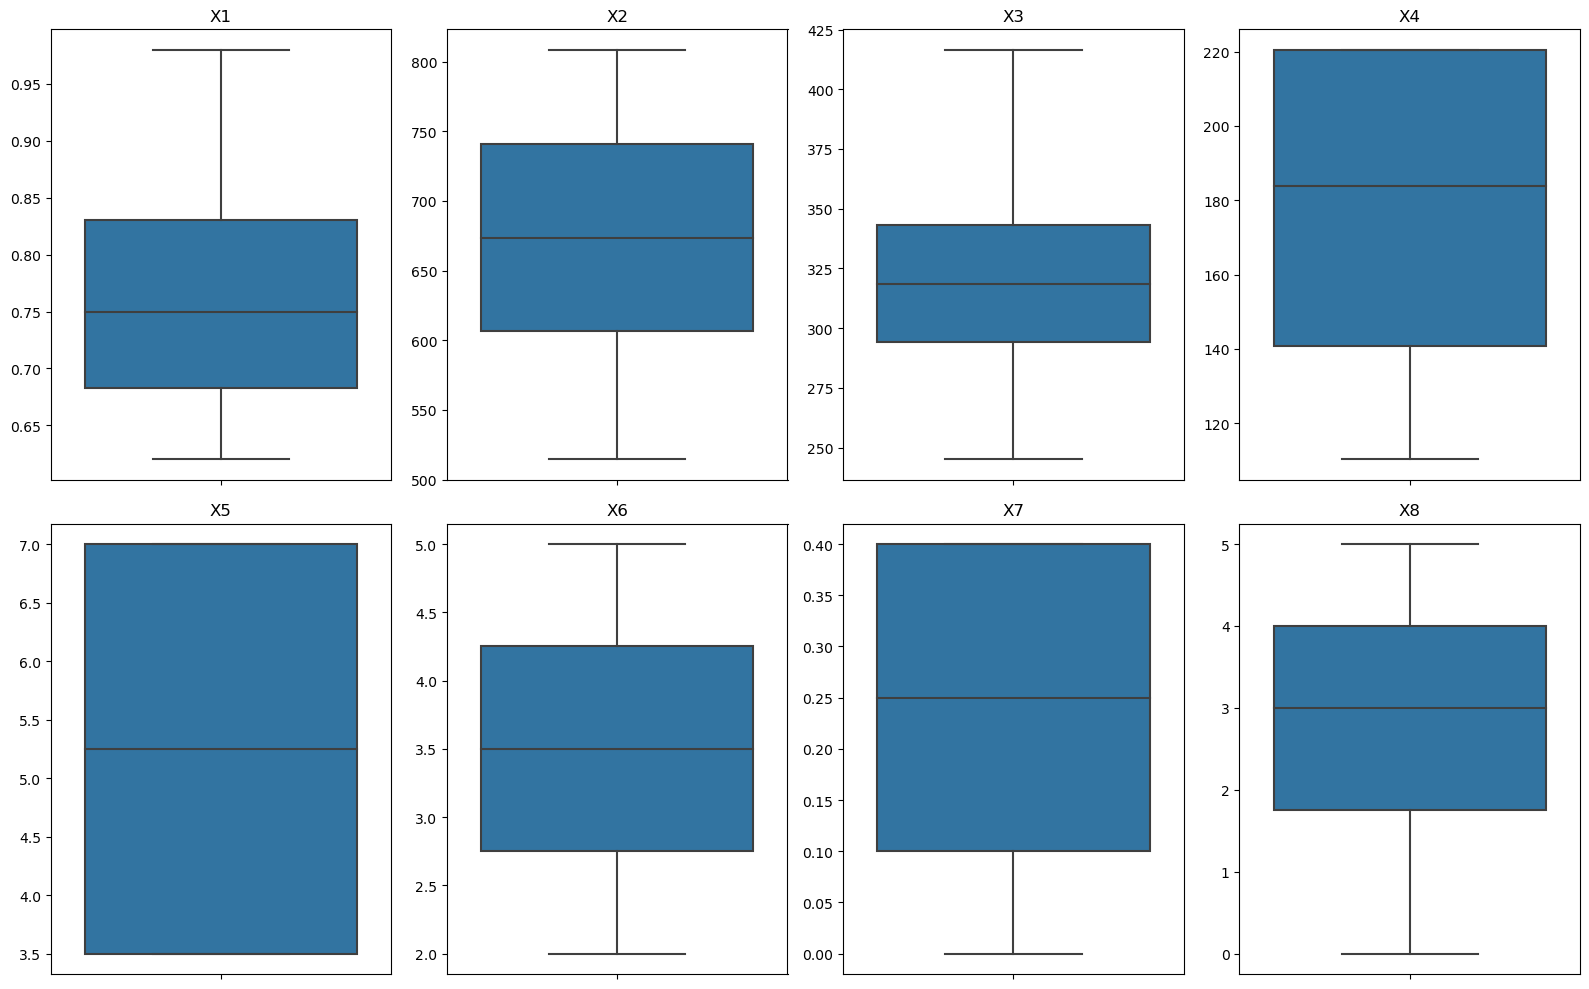

In [8]:
# Check the distribution of each variable
fig,axs = plt.subplots(nrows = 2, ncols = 4, figsize=(16,10),)
label = ["X"+str(n) for n in range(1,9)]
i = 0

for axi in axs:
    for ax in axi:
        sn.boxplot(y = df[label[i]].values, ax = ax)
        ax.set_title(label[i])
        i +=1 
plt.tight_layout()
plt.show()

# Data preparation


1.   Split our data into training and testing datasets and store the target values in different variables. 
2.   Normalize the features by applying some operations in the data sets.




In [12]:
#Train test split
x_train, x_test = train_test_split(df, test_size = 0.2)

#train values
Y1_train = np.array(x_train["Y1"])
Y2_train = np.array(x_train["Y2"])

#test values
Y1_test = np.array(x_test["Y1"])
Y2_test = np.array(x_test["Y2"])

#remove the target values from the dataset
x_train = x_train.drop(["Y1","Y2"], axis = 1)
x_test = x_test.drop(["Y1","Y2"], axis = 1)

In [ ]:
#Normalizing the data set
x_train_norm = (x_train-x_train.mean())/x_train.std()
x_test_norm = (x_test-x_test.mean())/x_test.std()